### **Section 5.3 - Vector-Based Output (Distance to Centroid)**
In this notebook, we evaluate centroid distance measures on DRAW-1K, CSQA and Last Letters dataset with 5 different temperature settings.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
FEATURE = 'majority_distance'

In [66]:
def generate_chart(dataframe: pd.DataFrame, x_axis: str, y_axis: str, filter):
    ret = []
    values = dataframe[x_axis].sort_values().unique().tolist()
    for value in values:
        filtered_entropy = dataframe[filter(dataframe[x_axis], value)]
        filtered_wrong = filtered_entropy[~filtered_entropy[y_axis]]
        
        if len(filtered_entropy) == 0 or len(filtered_wrong) == 0: continue
        ret.append({
            x_axis: value, 
            'support': len(filtered_entropy), 
            'amount_wrong': len(filtered_wrong), 
            'probability_of_failure': len(filtered_wrong) / len(filtered_entropy)
        })
    return pd.DataFrame(ret)

def generate_geq(dataframe: pd.DataFrame, x_axis: str, y_axis: str):
    return generate_chart(dataframe, x_axis, y_axis, lambda dat, y: dat >= y), 'Minimum'

def generate_leq(dataframe: pd.DataFrame, x_axis: str, y_axis: str):
    return generate_chart(dataframe, x_axis, y_axis, lambda dat, y: dat <= y), 'Maximum'

In [67]:
line_styles = {
    'base-T0.3': '-',
    'base-T0.5': '--',
    'base-T0.7': ':',
    'base-T0.8': (5, (10, 3)),
    'base-T0.9': (0, (3, 5, 1, 5, 1, 5))
}

In [68]:
def plot_feature_vs_failure(df, type, variation, DATASET):
    legend_label_mapping = {
        'base-T0.3': 'Temp = 0.3',
        'base-T0.5': 'Temp = 0.5',
        'base-T0.7': 'Temp = 0.7',
        'base-T0.8': 'Temp = 0.8',
        'base-T0.9': 'Temp = 0.9',
    }

    color_mapping = {
        'base-T0.3': 'black',
        'base-T0.5': 'lightgray',
        'base-T0.7': 'gray',
        'base-T0.8': 'darkgray',
        'base-T0.9': 'dimgray',
    }

    legend_label = legend_label_mapping.get(variation, variation)
    line_color = color_mapping.get(variation, 'black')  
    plt.plot(df[FEATURE], df['probability_of_failure'], linestyle=line_styles[variation], label=legend_label, color=line_color)

    data_label_mapping = {
        'draw': 'DRAW-1K',
        'csqa': 'CSQA',
        'last_letters': 'LL'
    }

    label_data = data_label_mapping.get(DATASET)
    plt.xlabel(f'{type} Distance from Centroid', fontsize=13, weight='bold')
    plt.ylabel(f'Probability of Failure ({label_data})', fontsize=13, weight='bold')
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.grid(True)

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1)

    max_x = df[FEATURE].max()
    ticks = plt.xticks()[0]
    interval = ticks[1] - ticks[0] if len(ticks) > 1 else 0.5
    next_tick = np.ceil(max_x / interval) * interval

    plt.xlim(0, next_tick)
    plt.ylim(0)


In [69]:
def plot_and_generate(DATASET, VARIATION, generate_func):
    file_path = f'../../data/machine-learning/{VARIATION}/{DATASET}.jsonl'
    data = pd.read_json(file_path, lines=True)
    entropy, type_str = generate_func(data, FEATURE, 'majority_correct')
    plot_feature_vs_failure(entropy, type_str, VARIATION, DATASET)

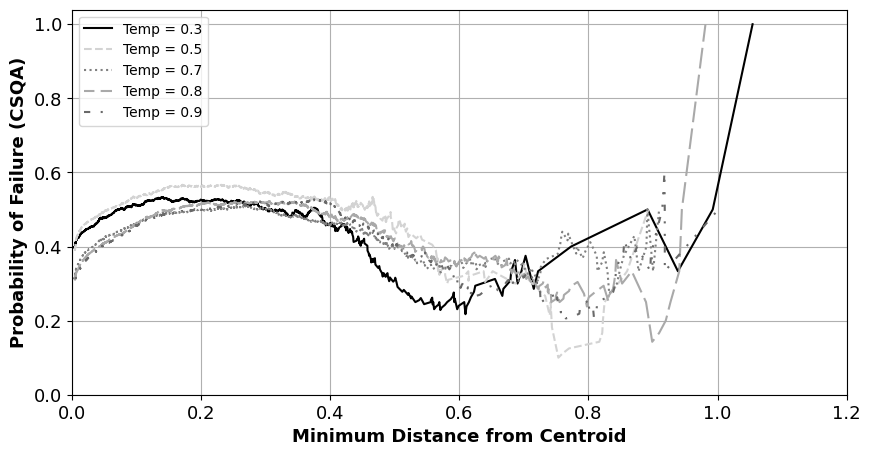

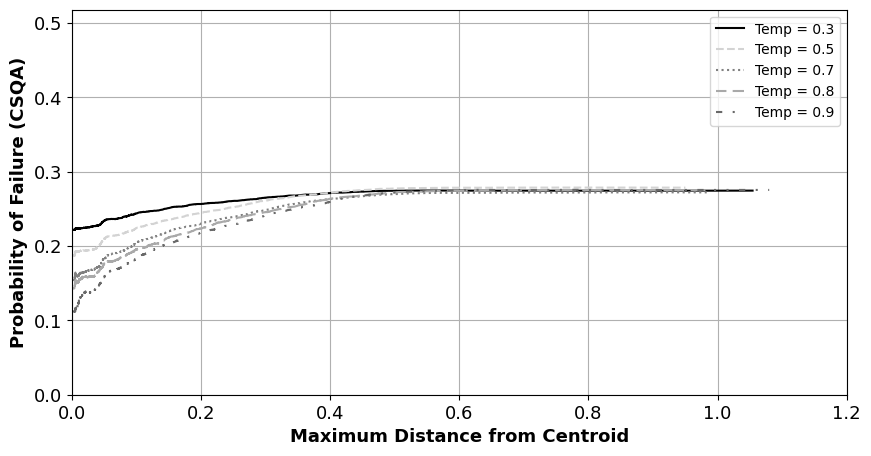

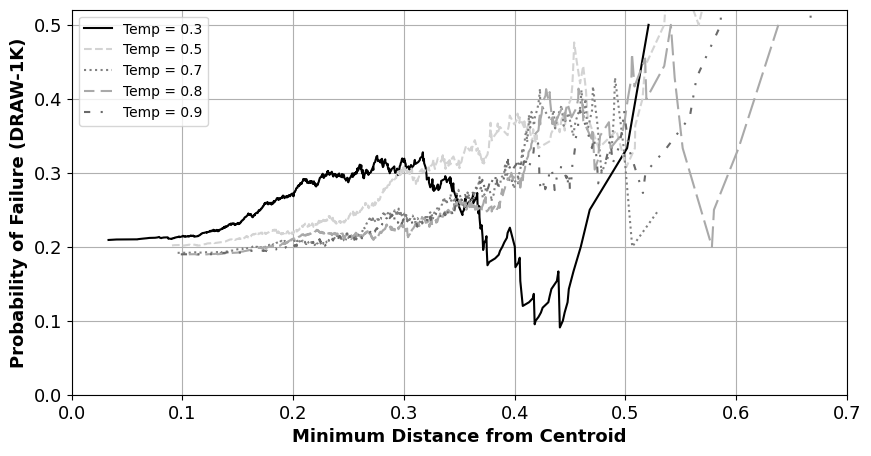

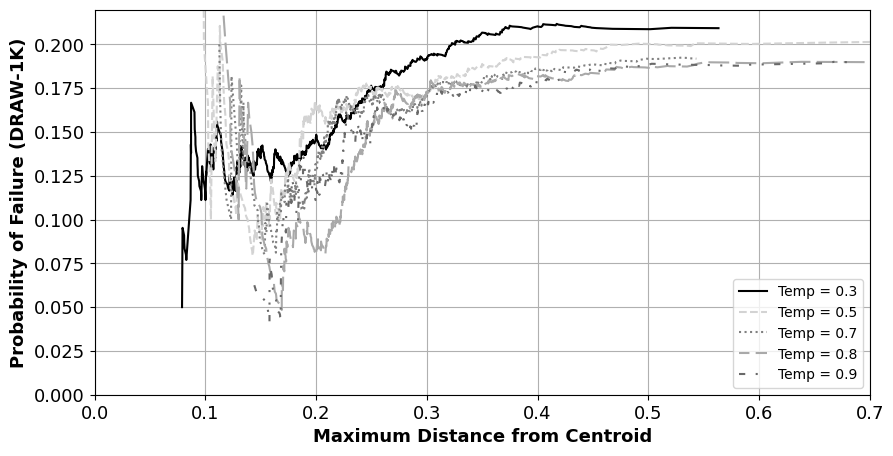

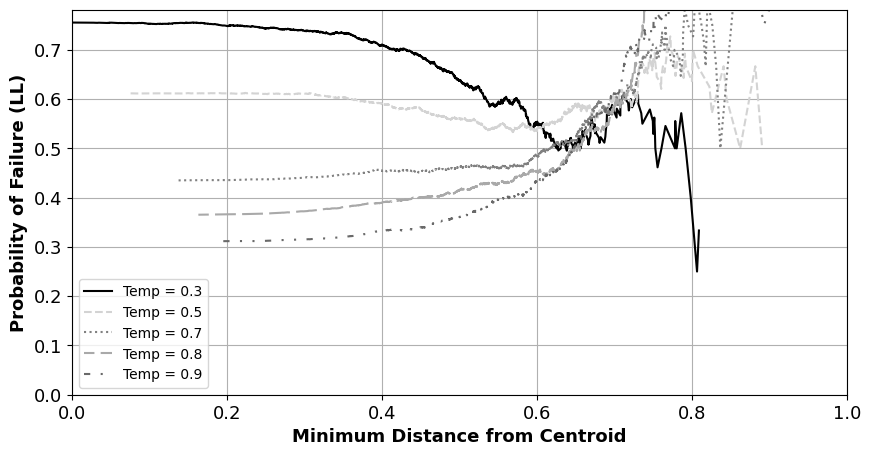

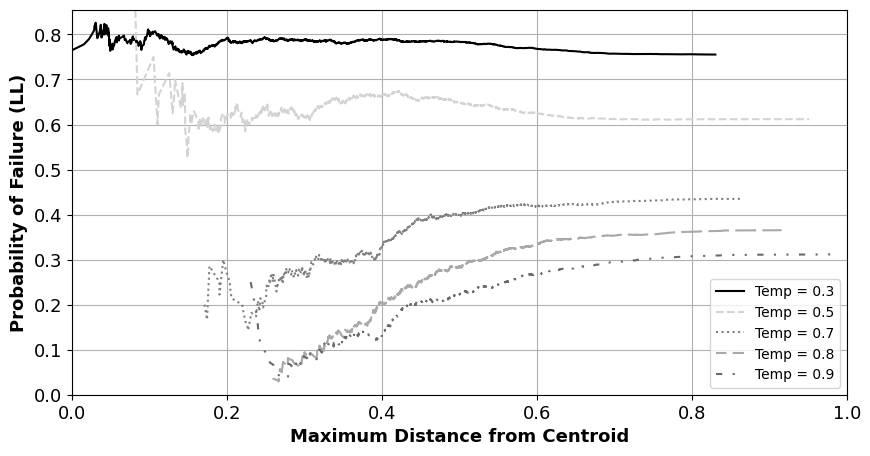

In [70]:
for DATASET in ['csqa', 'draw', 'last_letters']:
    plt.figure(figsize=(10,5))
    for VARIATION in ['base-T0.3', 'base-T0.5', 'base-T0.7', 'base-T0.8', 'base-T0.9']:
        plot_and_generate(DATASET, VARIATION, generate_geq)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,5))
    for VARIATION in ['base-T0.3', 'base-T0.5', 'base-T0.7', 'base-T0.8', 'base-T0.9']:
        plot_and_generate(DATASET, VARIATION, generate_leq)
    plt.legend()
    plt.show()